### Importing Libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt

### setting parameters

In [40]:
a = 0.02
b = 0.2
c = -50
d = 2

# initial membrane volatge in microvolts
v = -65

# initial value of u 
u = v * b

In [42]:
# initialize variables

# 1000 millisecond or 1 second of simulation
simulation_time = 1000  

# membrane voltage potential
memvolt = np.zeros(simulation_time) 
# v is membrane volatge potential but it is a scalar value
# to plot we need to store value of membrane potential  for each miliscond


# input across all time
Iall = np.zeros(simulation_time)

In [43]:
# looping over simulation time

for t in range(simulation_time):
    
    
    I = -2 if (t > 200) & (t < 400) else 7 
    
    # check if there is an action potential
    # that is if it exceeds the membrane threshold
    
    if v >= 30:
        v = c
        u += d
        
    # update the membrane variable
    v +=  0.04* v ** 2 + 5 * v + 140 - u + I
    u += a *(b * v - u)
    
    # collecting variables for plotting
    memvolt[t] = v
    Iall[t] = I
        

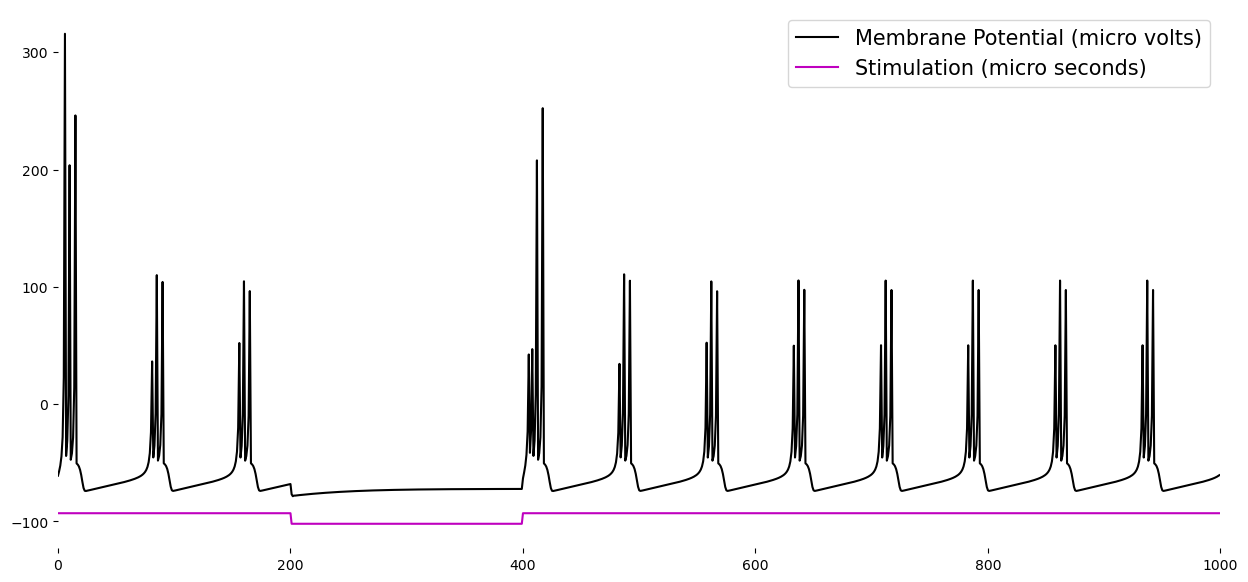

In [44]:
# plotting
fig, ax = plt.subplots(1, figsize =(15, 7))
plt.plot(memvolt, "k", label = "Membrane Potential (micro volts)")
plt.plot(Iall - 100, "m", label = "Stimulation (micro seconds)")
plt.box(False)
plt.xlim([0, simulation_time])
plt.legend(fontsize = 15)
plt.show()

###  Create 1000 circuit of neurons

In [45]:
# Excitatory neurons                 Inhibitory neurons
Ne = 800;                            Ni = 200
re = np.random.rand(Ne);             ri = np.random.rand(Ni)

#               excitatory           inhibitory
a = np.hstack((.02*np.ones(Ne),     .02+.08*ri))
b = np.hstack((.2*np.ones(Ne),      .25-.05*ri))
c = np.hstack((-65+15*re**2,        -65*np.ones(Ni)))
d = np.hstack((8-6*re**2,            2*np.ones(Ni)))

# initial values of v and u
v = -65*np.ones(Ne+Ni)
u = b*v

# matrix of all-to-all synaptic weights
# this is the connectivity matrix which described the effect of action potential in 1 neuron 
# on the mebrane potential on teh other neuron

S = np.hstack((.5*np.random.rand(Ne+Ni,Ne), -np.random.rand(Ne+Ni,Ni) ))

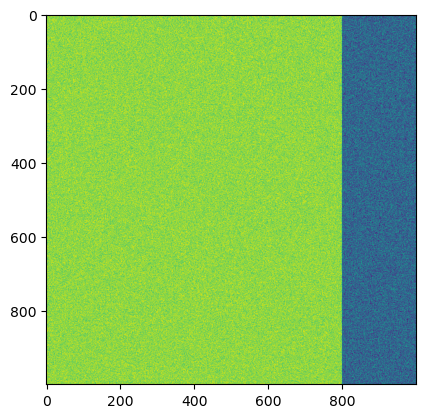

In [46]:
plt.imshow(S);

### Simulate Neural circuit

In [47]:
# initializations
simulation_time = 5000  # 5 sec
firings = np.array([[],[]])

# loop through simulation time
for t in range(simulation_time):

  # random exogenous input strength (different for E and I cells)
  I = np.hstack((5*np.random.randn(Ne),2*np.random.randn(Ni)))
  
  
  # check if action potential and update
  fired   = np.where(v>=30)[0]
  tmp     = np.stack((np.tile(t,len(fired)),fired))
  firings = np.concatenate((firings,tmp),axis=1)

  # update membrane variables for cells that fired
  v[fired] = c[fired]
  u[fired] = u[fired] + d[fired]

  # update membrane variables for down-stream cells
  I += np.sum(S[:,fired],axis=1)
  
  # update membrane voltage
  v += .04*v**2 + 5*v + 140 - u + I
  u += a*(b*v-u)

In [48]:
print(firings.shape)
firings

(2, 40521)


array([[   5.,    6.,    6., ..., 4998., 4999., 4999.],
       [ 667.,   26.,  123., ...,  708.,  499.,  983.]])

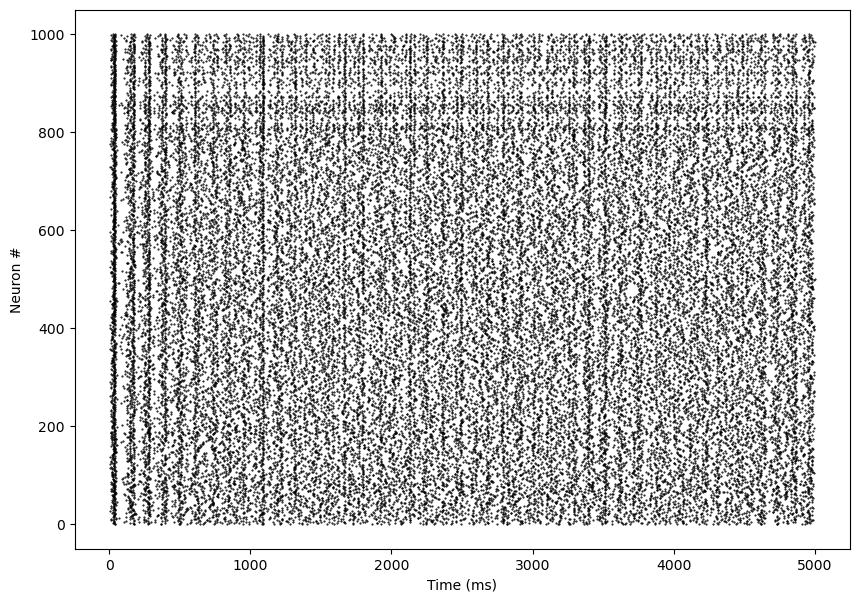

In [49]:
# visualize
fig,ax = plt.subplots(1,figsize=(10,7))

plt.plot(firings[0,:],firings[1,:],'k.',markersize=1)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron #')

plt.show()

### Visulaize Population Activity

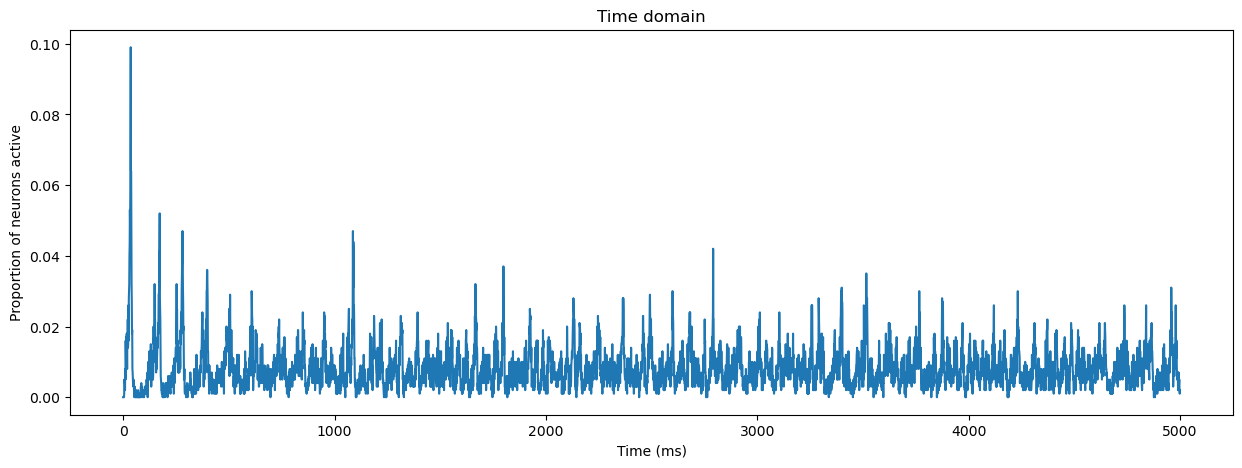

In [50]:
# population spiking activity
popact = np.zeros(simulation_time)

# looping over time and finding the units that spiked at that time
for ti in range(simulation_time):
  popact[ti] = np.sum(firings[0,:]==ti) / (Ne+Ni)


fig,ax = plt.subplots(1,figsize=(15,5))

# time-domain plot
ax.plot(popact)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Proportion of neurons active')
ax.set_title('Time domain')


plt.show()

### Running Experiments

In [51]:
# a function to run the network

def simCircuit(I):
  
  # initializations
  firings = np.array([[],[]])

  # initial values of v and u
  v = -65*np.ones(Ne+Ni)
  u = b*v

  # looping through simulation time
  for t in range(len(I)):

    # stimulation for each neuron
    stim = np.hstack((4*np.random.randn(Ne),1*np.random.randn(Ni))) + I[t]
    
    # check if action potential and update
    fired   = np.where(v>=30)[0]
    tmp     = np.stack((np.tile(t,len(fired)),fired))
    firings = np.concatenate((firings,tmp),axis=1)

    # update membrane variables for cells that fired
    v[fired] = c[fired]
    u[fired] = u[fired] + d[fired]
    
    # update membrane variables for down-stream cells
    stim += np.sum(S[:,fired],axis=1)
    
    # update membrane voltage
    v += .04*v**2 + 5*v + 140 - u + stim
    u += a*(b*v-u)

  return firings

In [ ]:
I = (np.linspace(-2,2,3001))**2

# run the simulation 
networkspikes = simCircuit(I)


In [53]:
print("network spiked at:\n", networkspikes)

network spiked at:
 [[   4.    5.    5. ... 2991. 2992. 2998.]
 [ 622.   43.  145. ...  889.  288.  876.]]
